In [1]:
from __future__ import division, print_function

# Third-party
from astropy.constants import G
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Custom
import gary.integrate as gi

See: http://adrian.pw/gary/integrate/index.html

In [2]:
# define a unit system (length, time, mass)
units = (u.au, u.yr, u.Msun)

In [3]:
# can change this to do 3D
ndim = 2
nparticles = 2

_G = G.decompose(units).value
def kepler_grad(m, xyz):
    return -_G*m*xyz / np.sqrt(np.sum(xyz**2))**3

def F(t, w, mass):
    """ 
    This function takes (at minimum) a time and a phase-space vector (position and velocity). 
    Here, we also allow for another parameter: an array of masses, one for 
    each particle.
    """
    
    # reshape just to make it easier to deal with
    ww = w.reshape(nparticles, 2*ndim)
    x = ww[:,:ndim]
    v = ww[:,ndim:]
    
    # container for acceleration values
    xdot = v
    vdot = np.zeros_like(v)
    
    for i in range(nparticles):
        for j in range(nparticles):
            if i == j: continue
            vdot[i] += -kepler_grad(mass[j], x[j]-x[i]) 
    
    return np.ravel(np.hstack((xdot,vdot)))

In [4]:
# define the masses of our particles (in units of Msun)
masses = [1., 1.]

integrator = gi.DOPRI853Integrator(F, func_args=(masses,))

In [5]:
# position, velocity for each particle (x,y,vx,vy)
initial_conditions = np.array([[1.,0.,0.,0.8*np.pi],
                               [-1.,0.,0.,-0.8*np.pi]])
t,w = integrator.run(w0=np.ravel(initial_conditions), dt=0.01, nsteps=1000)
w = w[:,0].reshape(len(t), nparticles, 2*ndim)

(-2, 2)

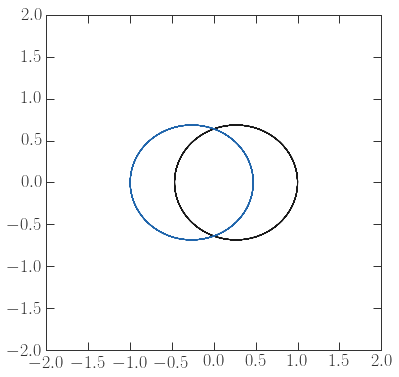

In [6]:
plt.figure(figsize=(6,6))
plt.plot(w[:,0,0], w[:,0,1], marker=None)
plt.plot(w[:,1,0], w[:,1,1], marker=None)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

If you want a little movie, install the python package `JSAnimation`:

In [7]:
from JSAnimation import IPython_display
from matplotlib import animation

In [8]:
def make_anim(x, nframes=100):
    # create a simple animation
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)

    pt1 = ax.scatter([], [], marker='o', s=64, c='#333333')
    pt2 = ax.scatter([], [], marker='o', s=64, c='#9B261F')
    
    fig.tight_layout()

    def animate(i):       
        pt1.set_offsets(x[i,0])
        pt2.set_offsets(x[i,1])
        return pt1,pt2

    anim = animation.FuncAnimation(fig, animate,frames=nframes, interval=20, blit=True)
    return anim


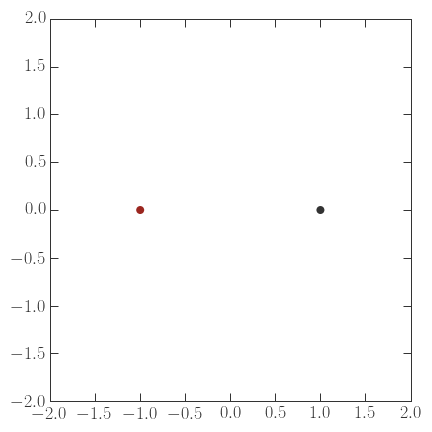
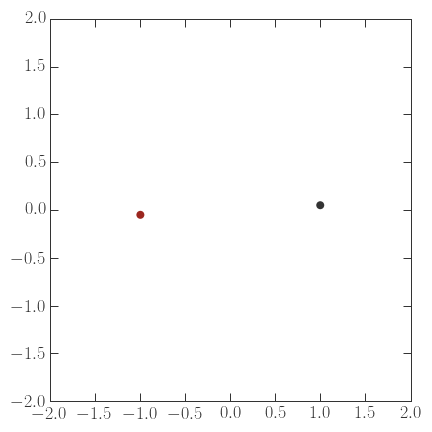
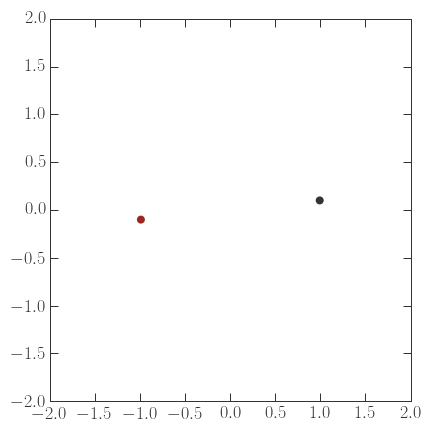
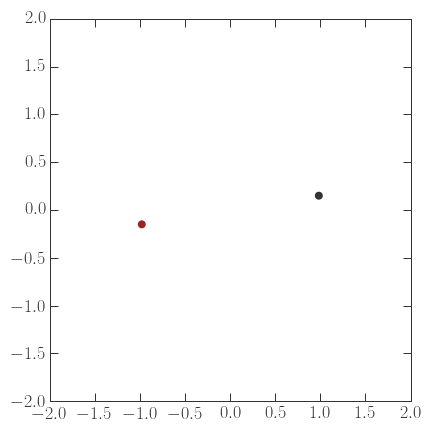
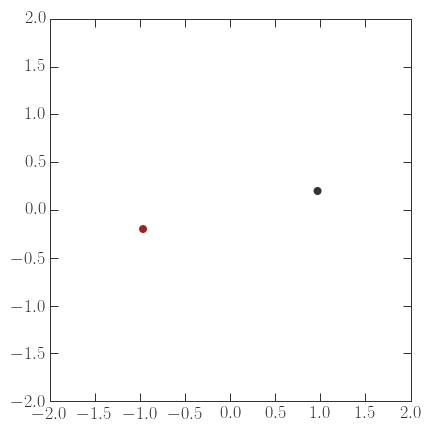
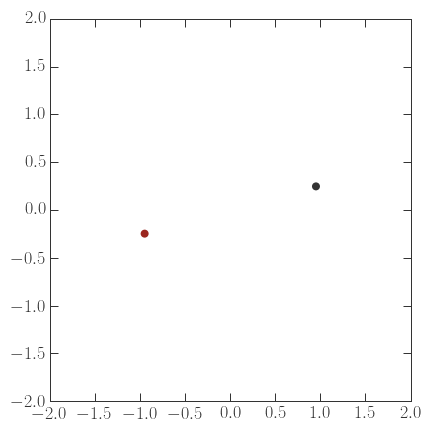
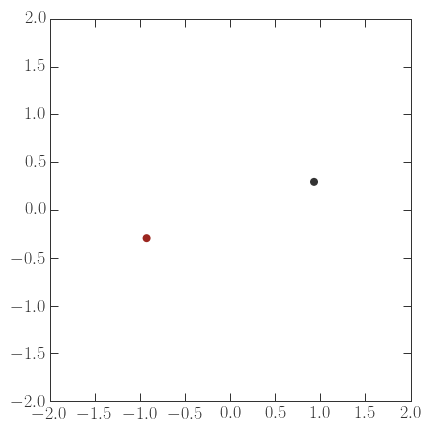
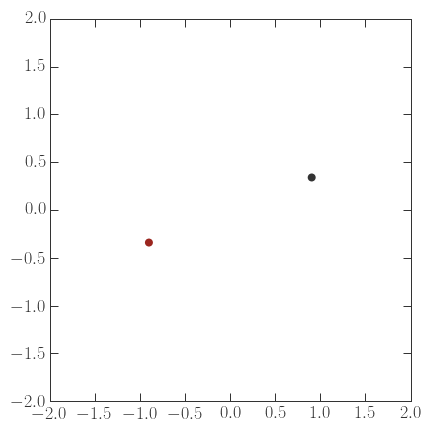
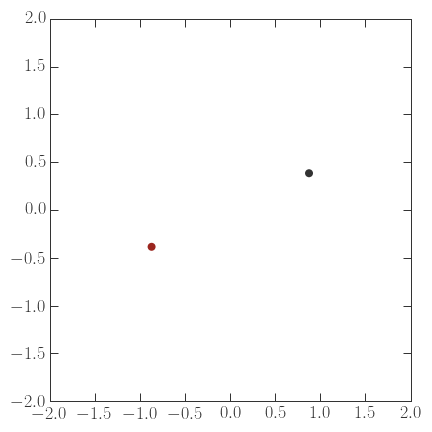
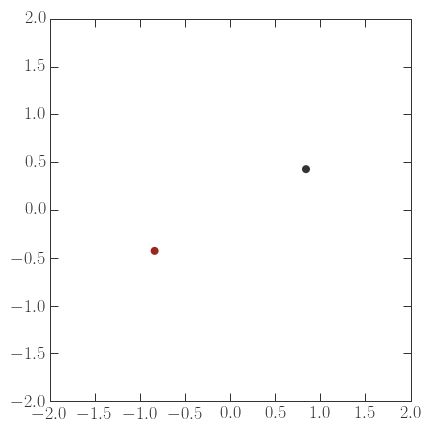
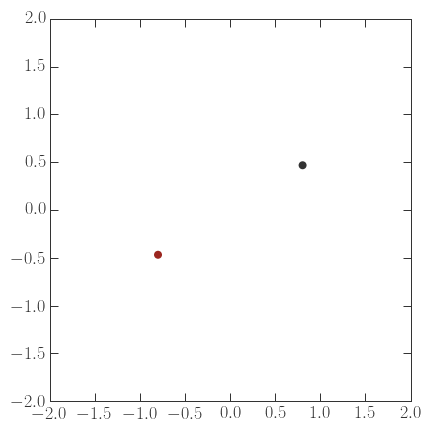
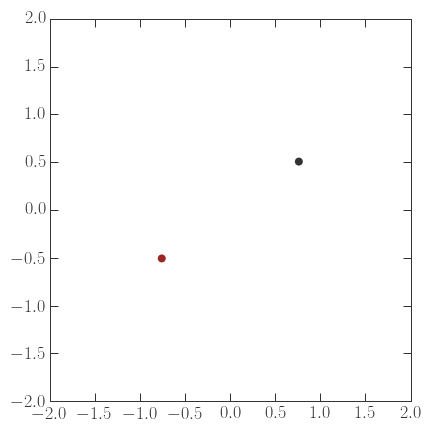
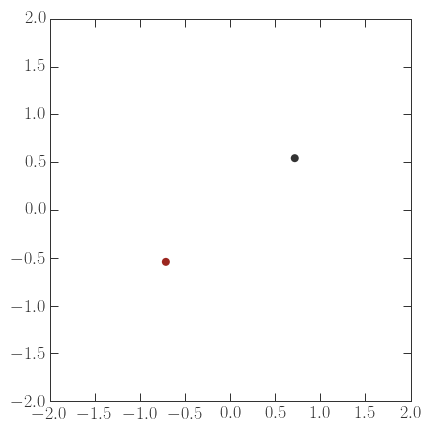
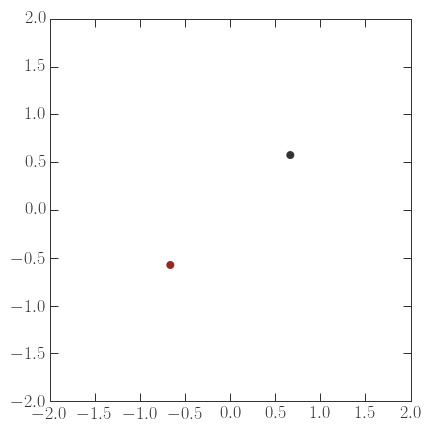
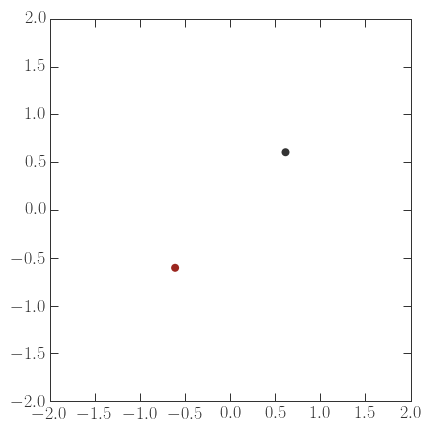
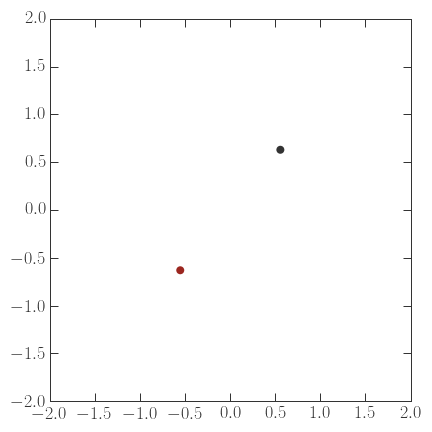
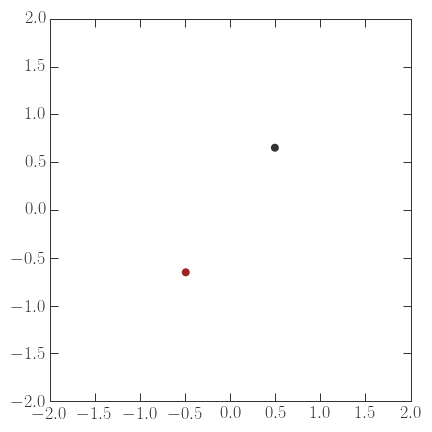
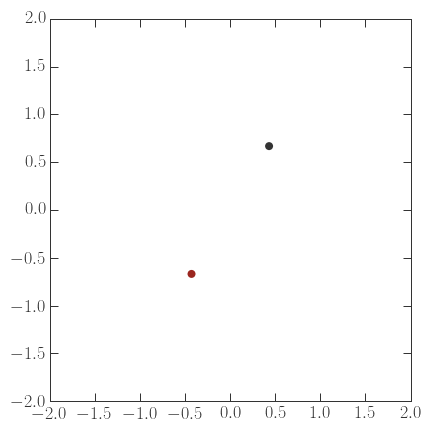
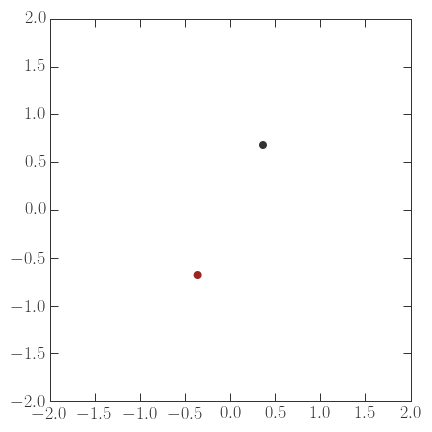
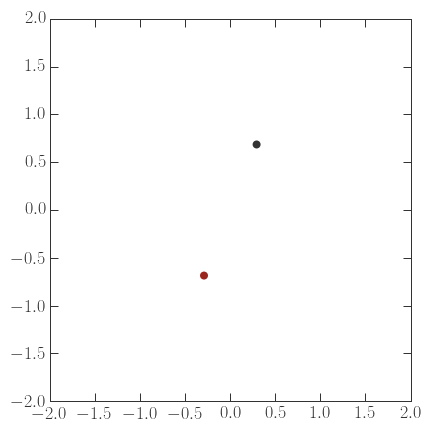
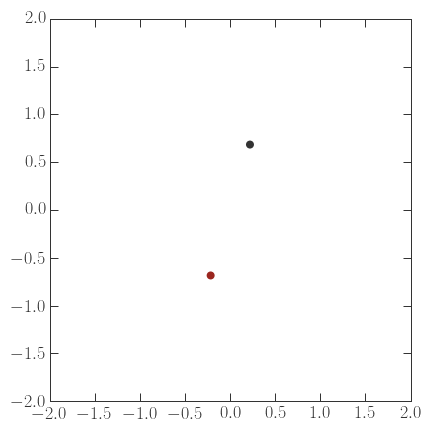
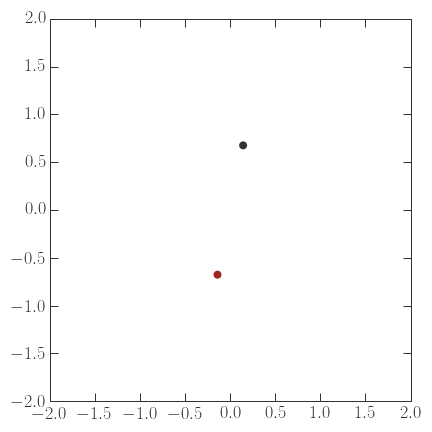
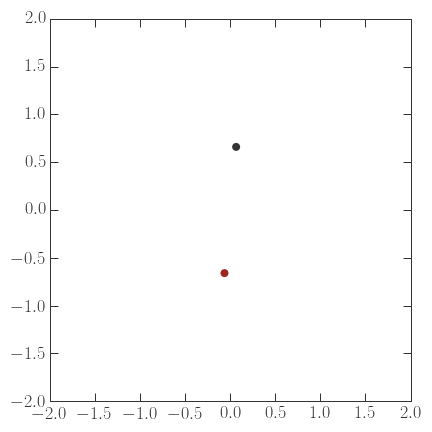
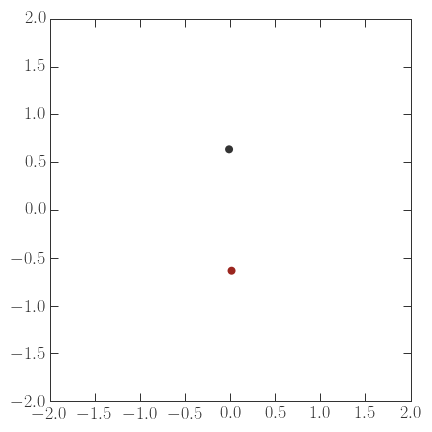
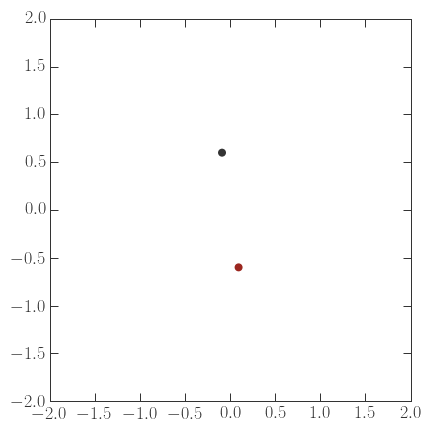
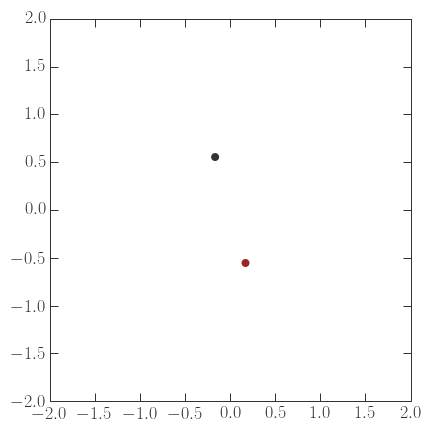
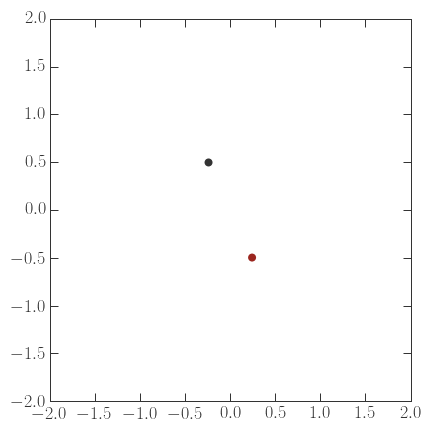
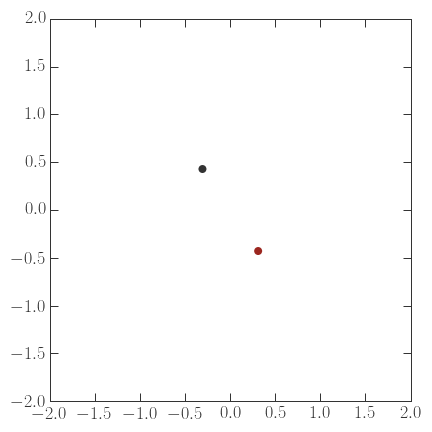
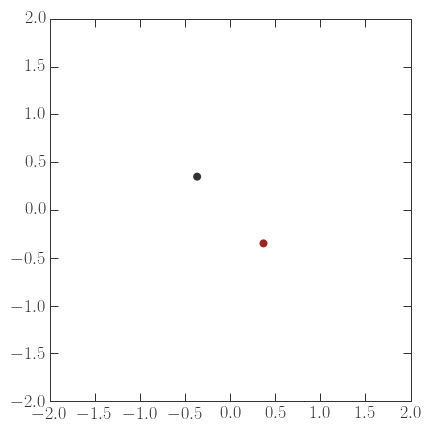
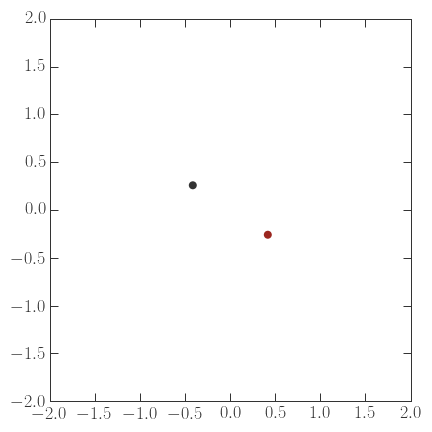
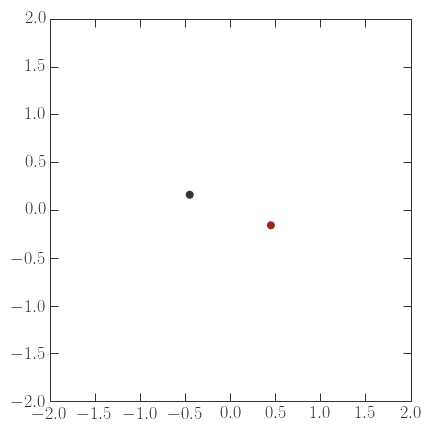
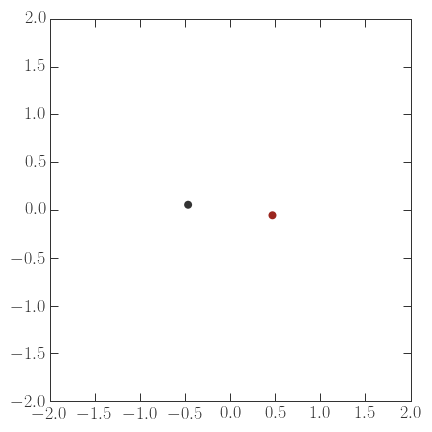
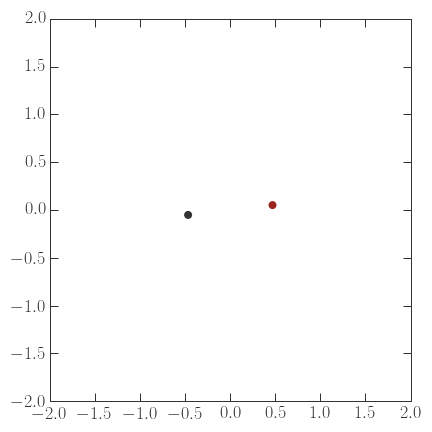
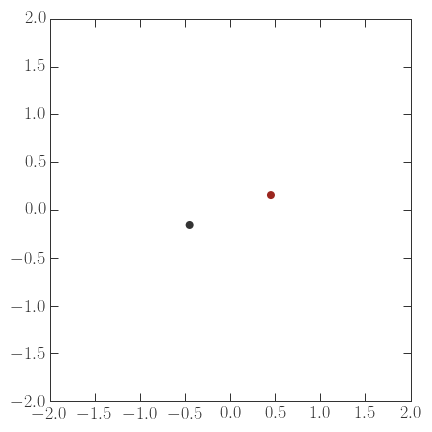
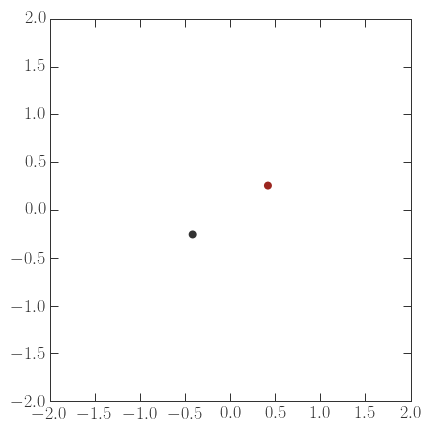
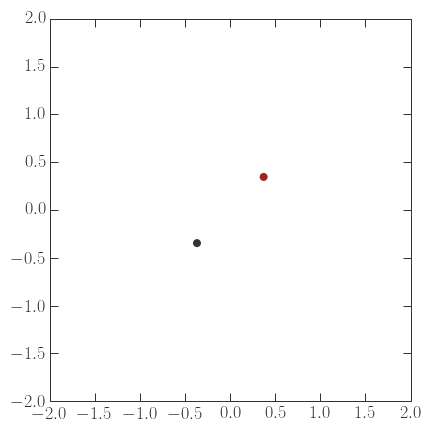
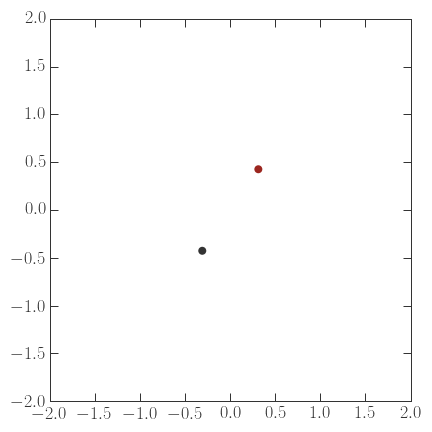
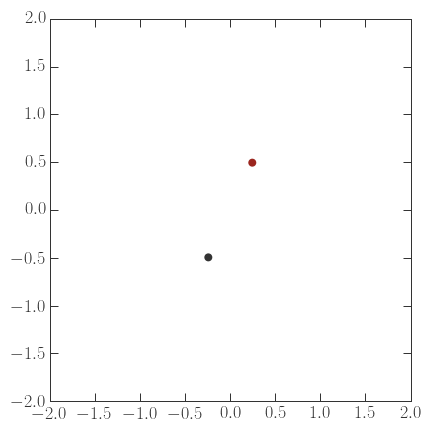
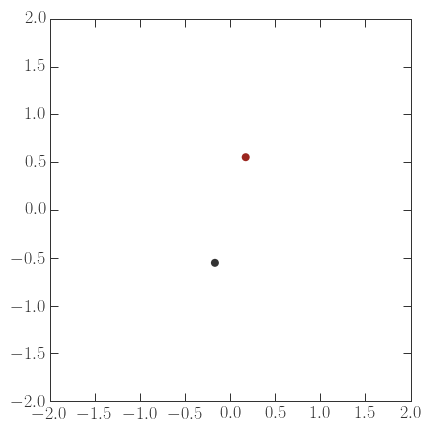
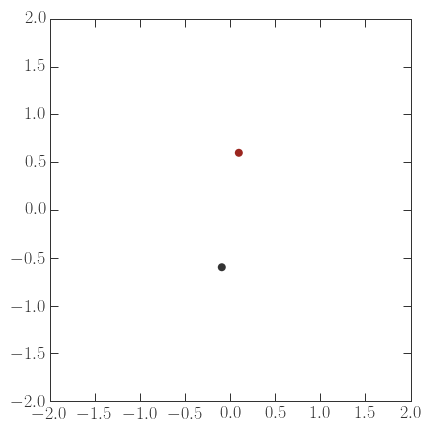
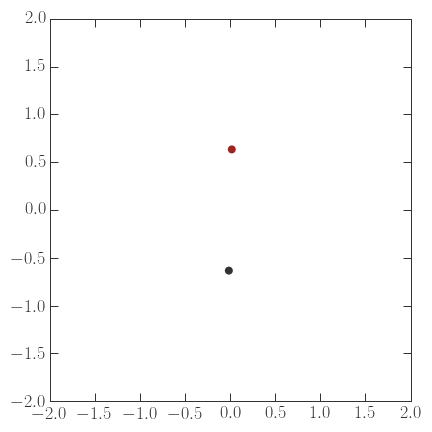
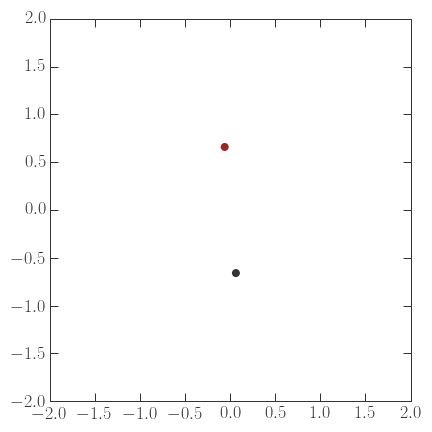
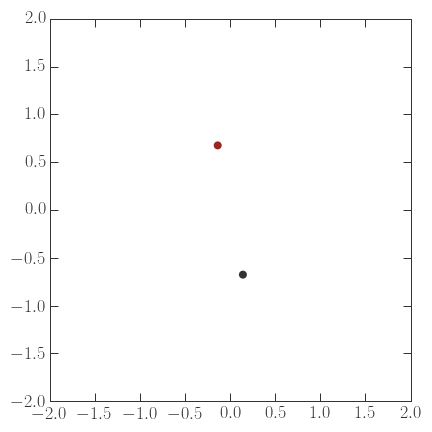
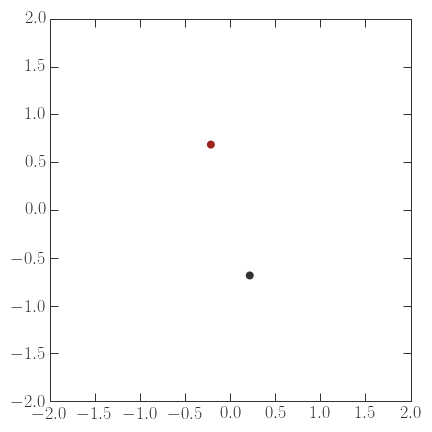
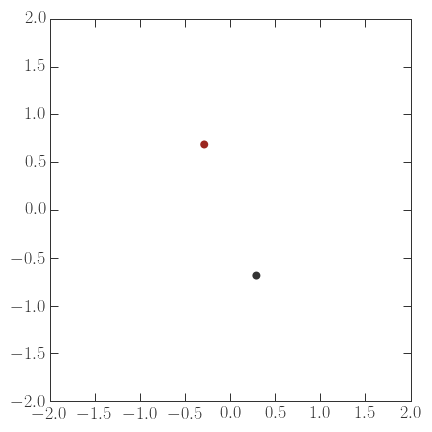
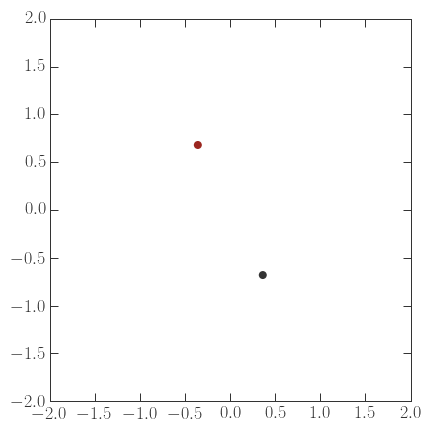
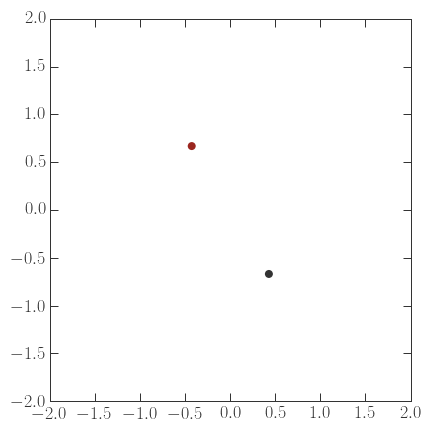
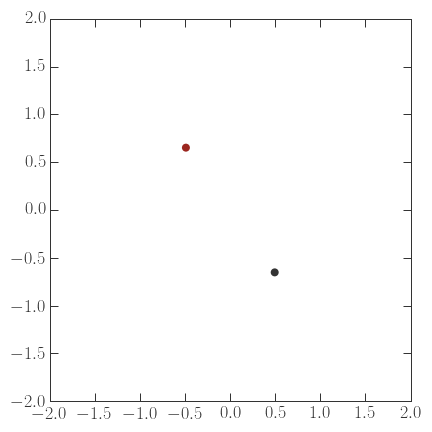
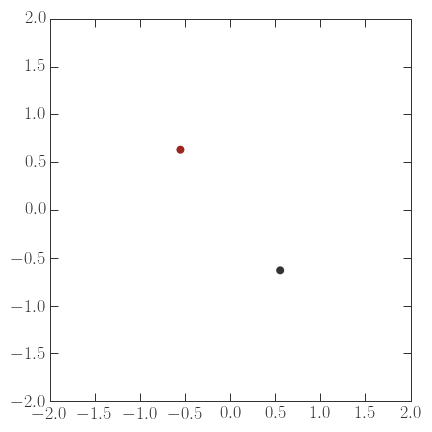
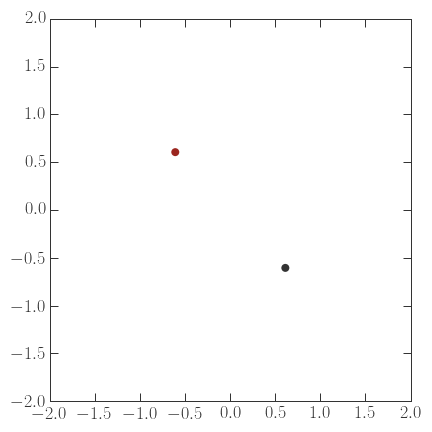
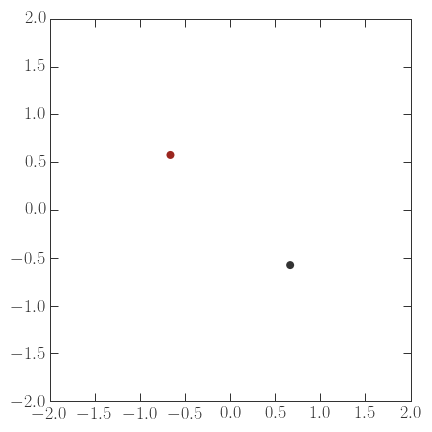
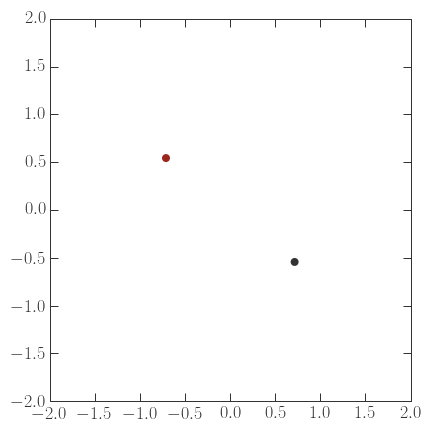
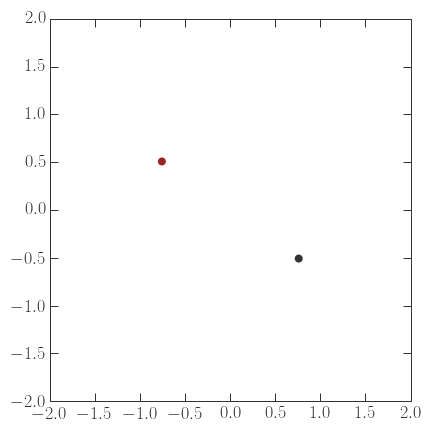
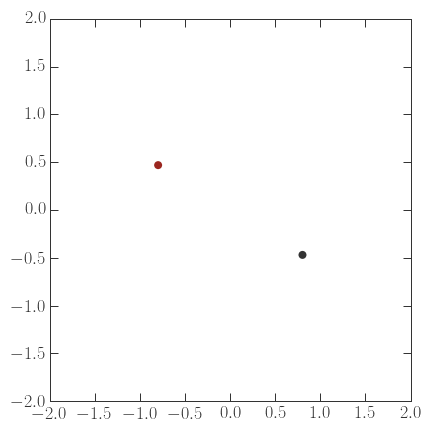
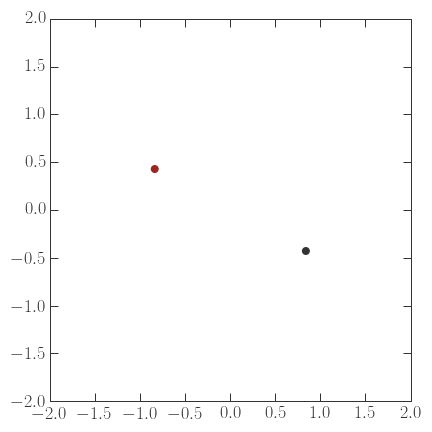
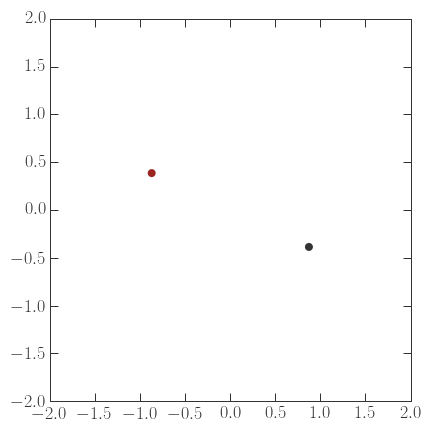
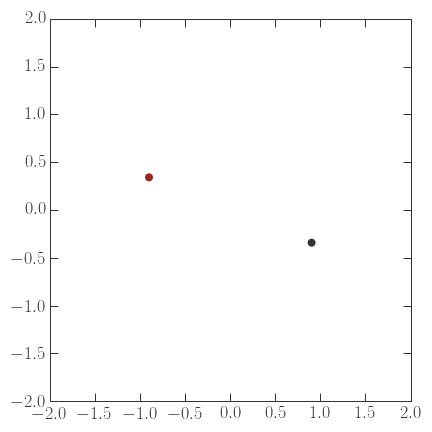
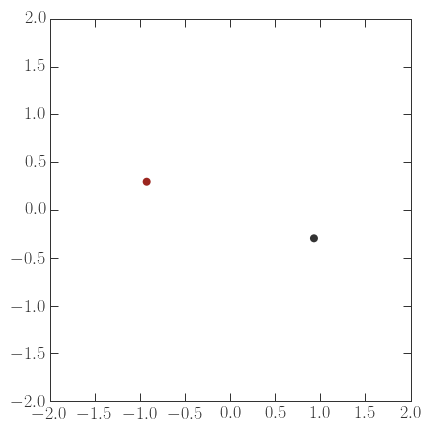
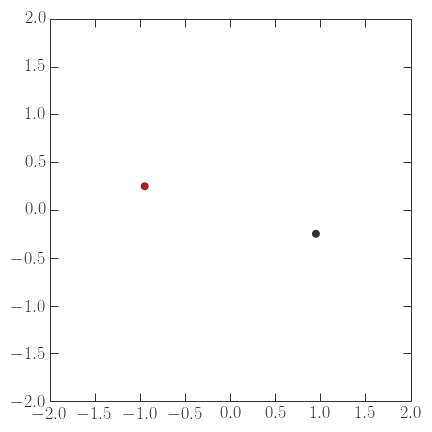
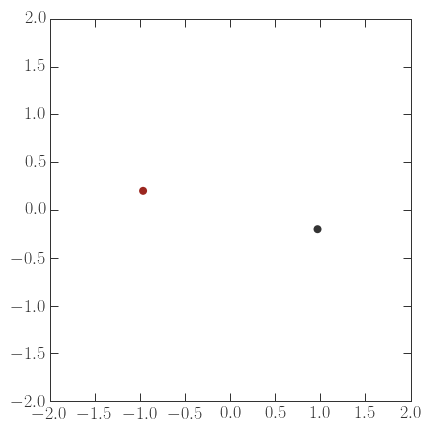
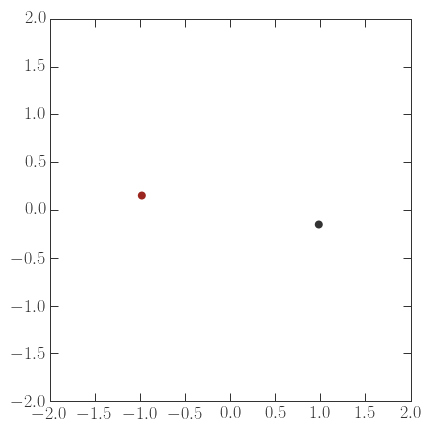
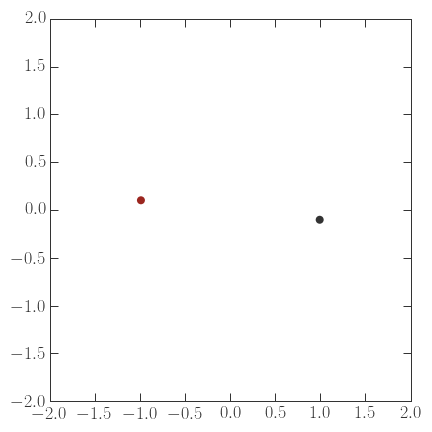
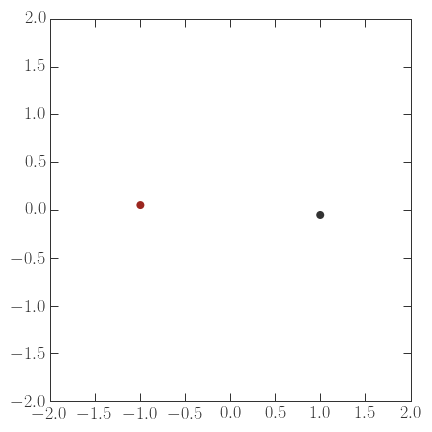
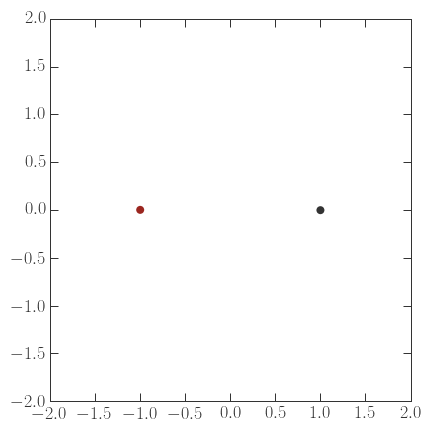
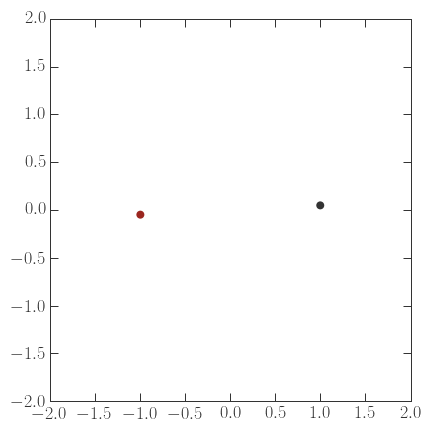
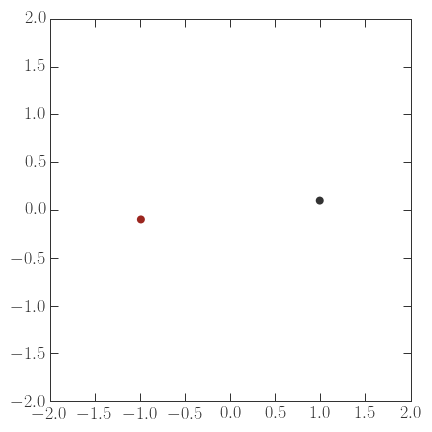
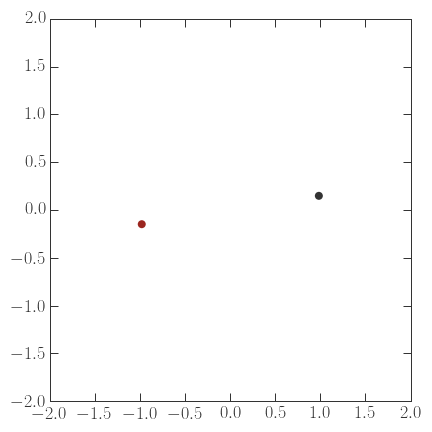
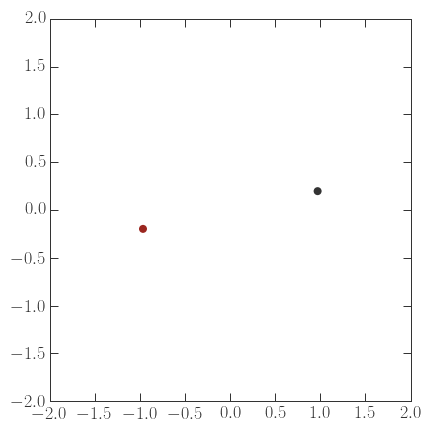
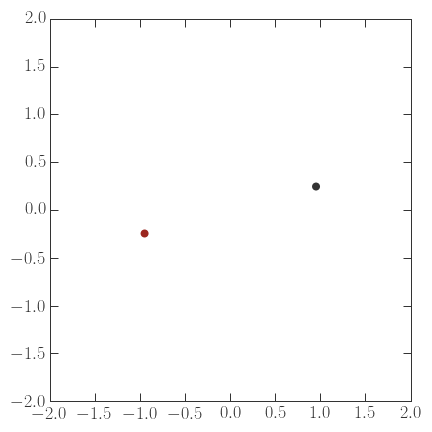
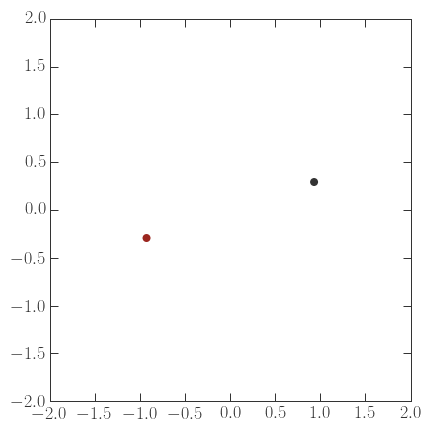
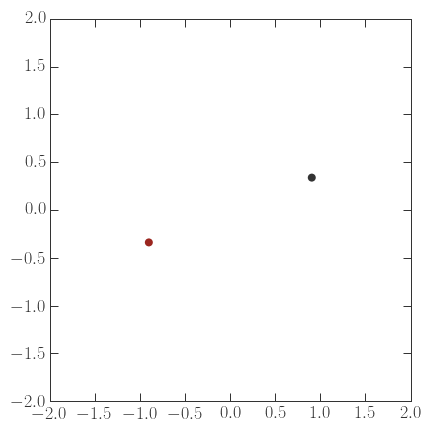
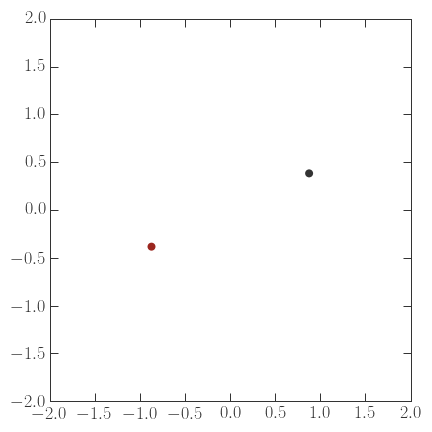
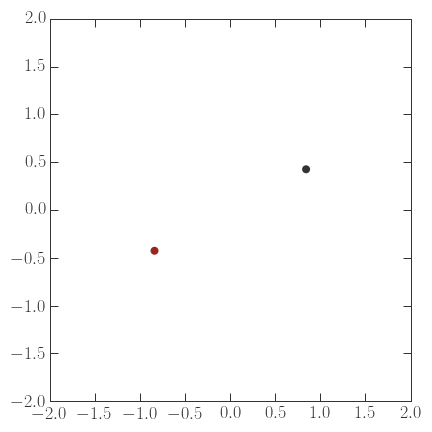
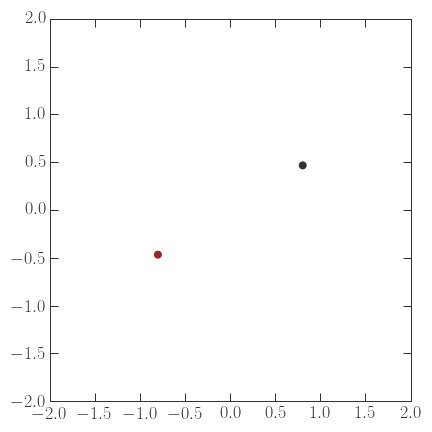
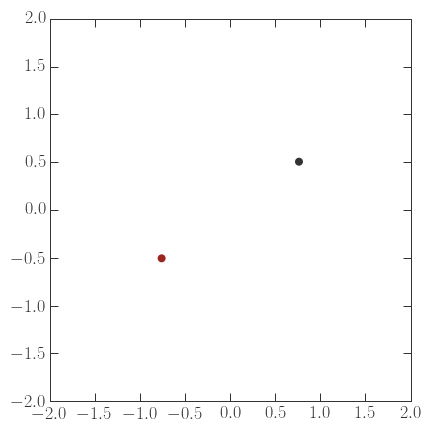
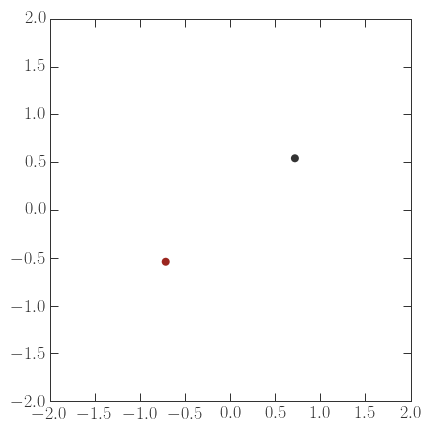
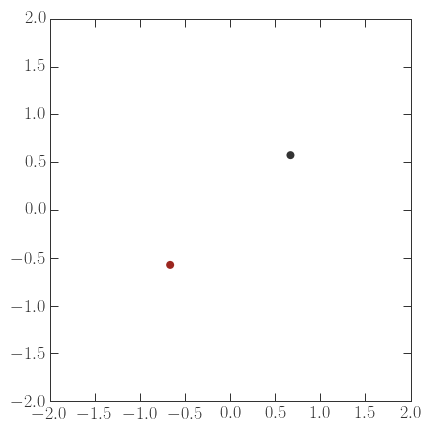
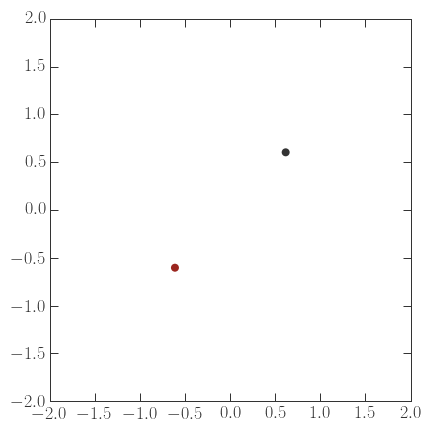
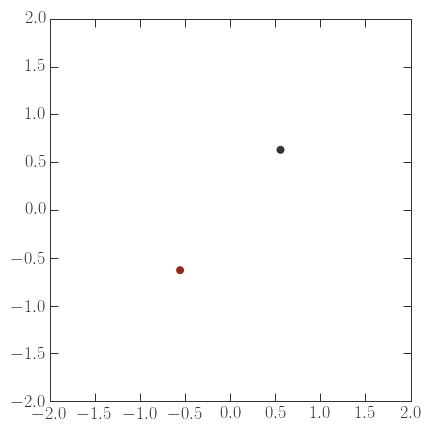
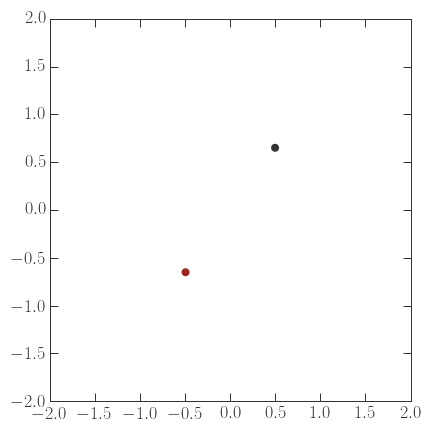
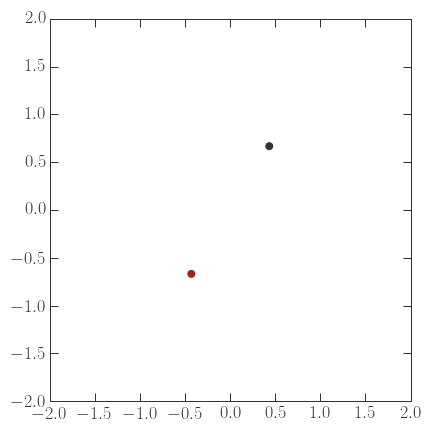
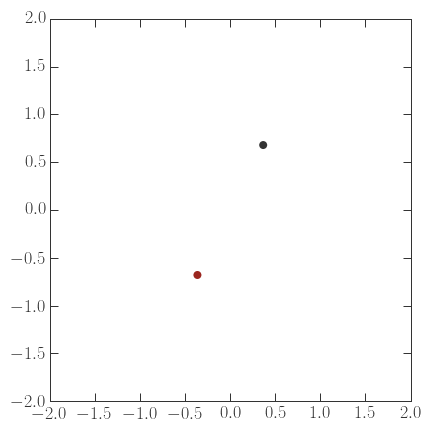
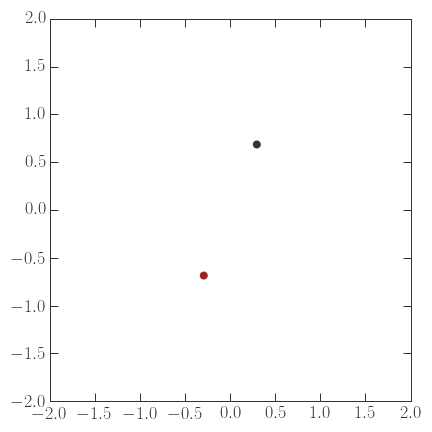
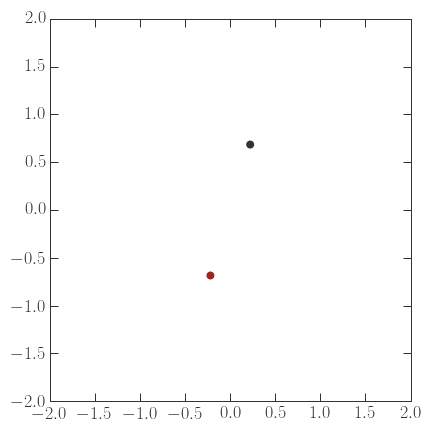
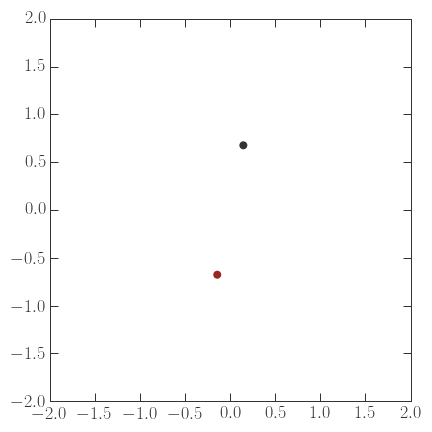
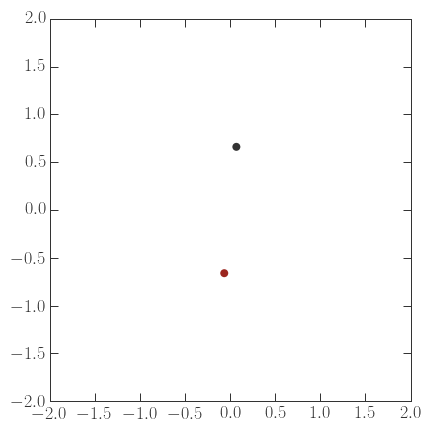
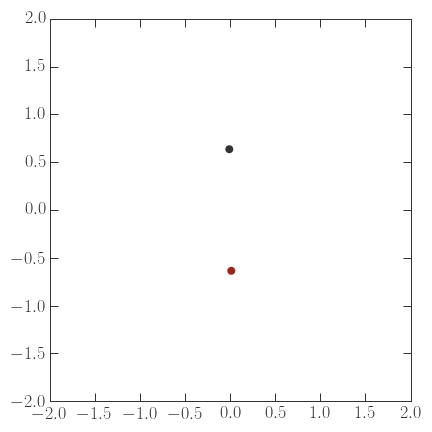
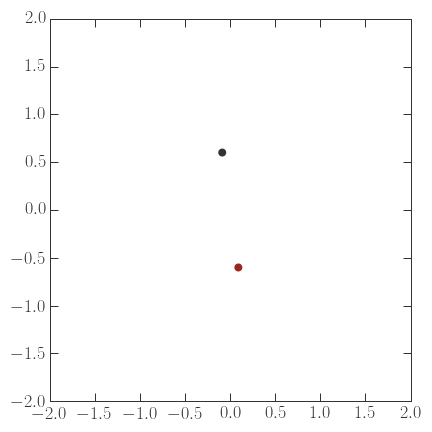
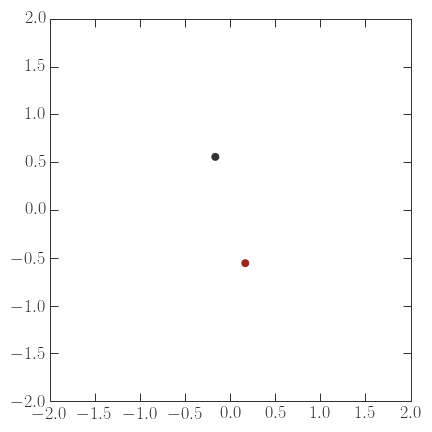
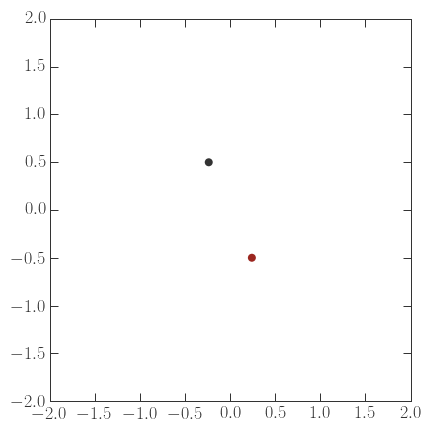
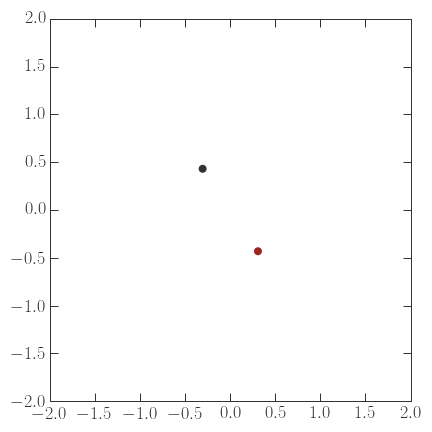
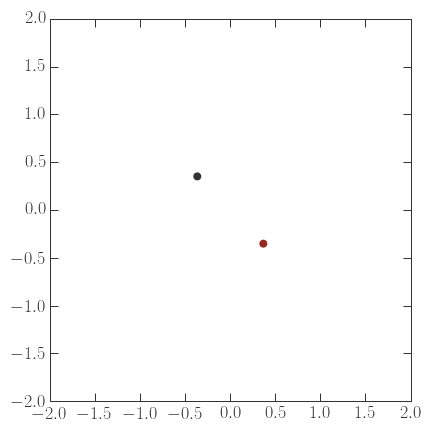
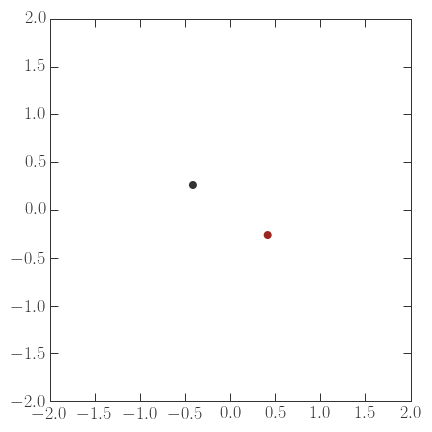
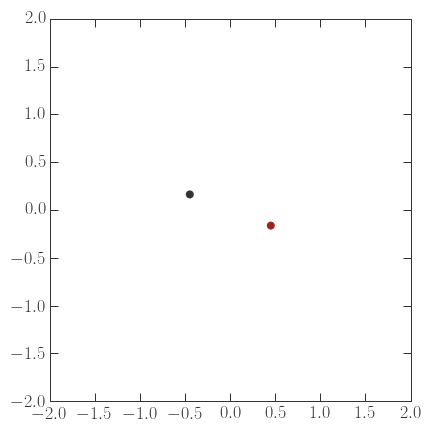
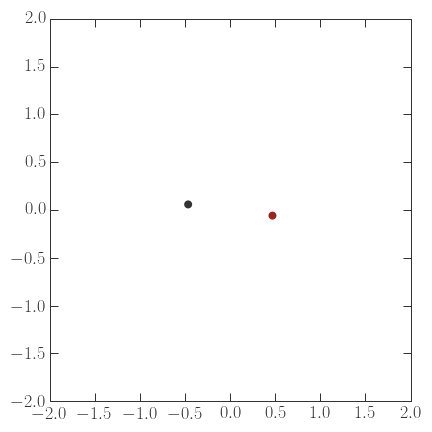
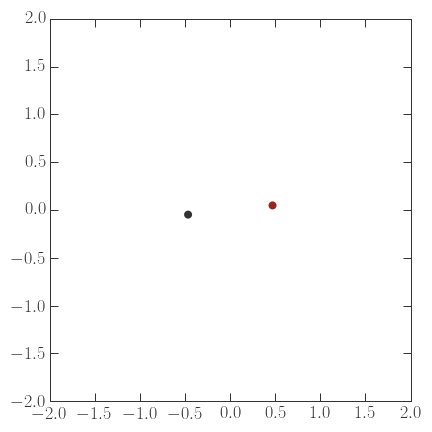
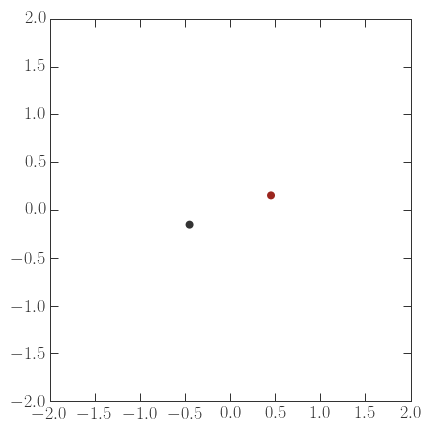
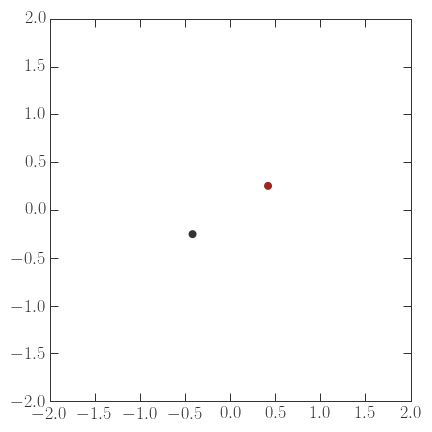
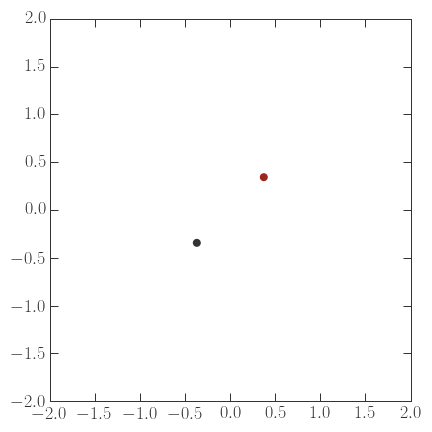
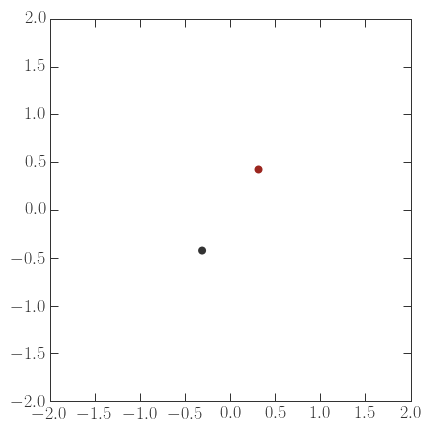

In [9]:
make_anim(w[::2,:,:2])